In [22]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## Building the ODE

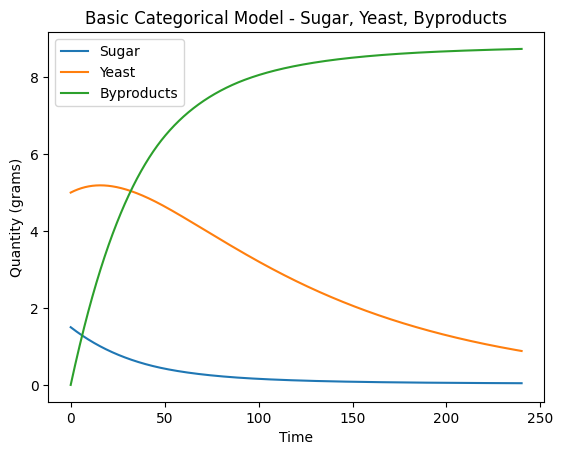

In [2]:
# Building the ODE
def ode(t, y, alpha, beta, gamma, delta):
    """
    Returns the ODE of our simple model.
    Assuming 3 categories; sugar, yeast, and byproducts, including CO2 and ethanol.
    Alpha controls sugar consumption. Beta controls reproduction rate of yeast. Gamma controls rate at which yeast cells die. Delta controls the production of byproducts.
    """
    return np.array([-alpha * y[0] * y[1], beta * y[0] * y[1] - gamma * y[1], delta * y[0] * y[1]])

# Building inputs
t0 = 0
tf = 4 * 60
t_span = (t0, tf)
y0 = np.array([1.5, 5, 0])  # Measured roughly in grams. Assuming 500 grams of flour
t = np.linspace(t0, tf, 1000)

# Parameters
alpha, beta, gamma, delta = 0.005, 0.01, 0.01, 0.03

sol = solve_ivp(ode, t_span, y0, t_eval=t,
                args=(alpha, beta, gamma, delta))

# Plotting the results
plt.plot(sol.t, sol.y[0], label="Sugar")
plt.plot(sol.t, sol.y[1], label="Yeast")
plt.plot(sol.t, sol.y[2], label="Byproducts")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Quantity (grams)")
plt.ylabel("Quantity (grams)")
plt.title("Basic Categorical Model - Sugar, Yeast, Byproducts")
plt.show()

## Fitting to Real-World Data

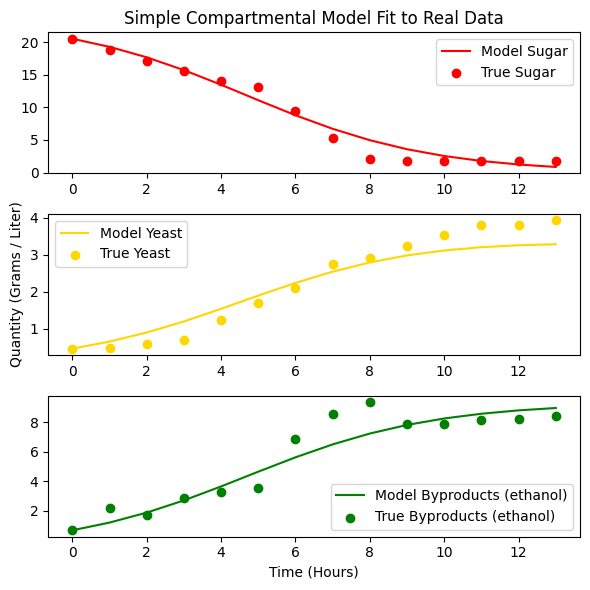

In [52]:
# Reading in data
sugar = pd.read_csv("data/sugar_strain1.csv").values[:, 1]
yeast = pd.read_csv("data/yeast_strain1.csv").values[:, 1]
byprod = pd.read_csv("data/ethanol_strain1.csv").values[:, 1]
true_vals = np.vstack([sugar, yeast, byprod])

# Making the error function
def calculate_error(params):
    """
    Computing the error of the ODE given its parameters
    """
    # Unpacking parameters
    alpha, beta, gamma, delta = params

    # Building the ODE
    def ode(t, y):
        return np.array([-alpha * y[0] * y[1], beta * y[0] * y[1] - gamma * y[1], delta * y[0] * y[1]])
    
    # Building time interval and initial conditions
    t0 = 0
    tf = 13
    t_span = (t0, tf)
    t_eval = np.linspace(t0, tf, 14)
    y0 = np.array([sugar[0], yeast[0], byprod[0]])

    sol = solve_ivp(ode, t_span, y0, t_eval=t_eval)

    # Computing the error using the Frobenius norm
    return np.linalg.norm(sol.y - true_vals, ord='fro')

# A guess for the parameters
p0 = (0.01, 0.01, 0.01, 0.01)
result = minimize(calculate_error, p0)
alpha, beta, gammal, delta = result.x

# Computing what our model estimates the result should be
def ode(t, y):
    return np.array([-alpha * y[0] * y[1], beta * y[0] * y[1] - gamma * y[1], delta * y[0] * y[1]])
    
# Building time interval and initial conditions
t0 = 0
tf = 13
t_span = (t0, tf)
t_eval = np.linspace(t0, tf, 14)
y0 = np.array([sugar[0], yeast[0], byprod[0]])

sol = solve_ivp(ode, t_span, y0, t_eval=t_eval)

# Graphing the result
plt.figure(figsize=(6, 6))
plt.subplot(3, 1, 1)
plt.plot(sol.t, sol.y[0], color='r', label="Model Sugar")
plt.scatter(t_eval, sugar, color='r', label="True Sugar")
plt.legend()
plt.title("Simple Compartmental Model Fit to Real Data")

plt.subplot(3, 1, 2)
plt.plot(sol.t, sol.y[1], color='gold', label="Model Yeast")
plt.scatter(t_eval, yeast, color='gold', label="True Yeast")
plt.ylabel("Quantity (Grams / Liter)")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(sol.t, sol.y[2], color='g', label="Model Byproducts (ethanol)")
plt.scatter(t_eval, byprod, color='g', label="True Byproducts (ethanol)")
plt.legend()
plt.xlabel("Time (Hours)")
plt.tight_layout()
plt.show()

In [53]:
print(f"alpha: {alpha}\nbeta: {beta}\ngamma: {gamma}\ndelta: {delta}")

alpha: 0.1127983210116926
beta: 0.017788187881001945
gamma: 0.01
delta: 0.04748943834320091
